In [116]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [38]:
#loading train test datasets into pandas dataframe
TrainData = pd.read_csv("C:\\Users\\VARSHITH\\CodeAlphaInternship\\Titanic-TrainData.csv")
TestData = pd.read_csv("C:\\Users\\VARSHITH\\CodeAlphaInternship\\Titanic-TestData.csv")

In [39]:
TrainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
TestData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
TrainData.shape

(891, 12)

In [42]:
TestData.shape

(418, 12)

In [43]:
TrainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
# Checking null values in Train Data
print(f"Null Values in Train Data:\n{((TrainData.isnull().sum())/(len(TrainData)))*100}")

Null Values in Train Data:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [46]:
# Checking null values in Test Data
print(f"Null Values in Train Data:\n{((TestData.isnull().sum())/(len(TestData)))*100}")

Null Values in Train Data:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


CABIN has most null values in both train and test sets

In [47]:
# Drop the column cabin from both train and test sets
TrainData.drop('Cabin', axis=1, inplace=True)
TestData.drop('Cabin',axis=1,inplace = True)
TrainData.shape , TestData.shape

((891, 11), (418, 11))

Deal with the Null values in AGE and EMBARKED columns

In [50]:
# filling null values in AGE column with average age as it is a numerical value
Avg_age = TrainData['Age'].mean()
TrainData['Age'] = TrainData['Age'].fillna(Avg_age)
TestData['Age'] = TestData['Age'].fillna(Avg_age)


In [51]:
# fill mode value inplace of null values in embarked column as it is a categorical value
TrainData['Embarked'].fillna(TrainData['Embarked'].mode()[0], inplace=True)

In [54]:
# fill mode value inplace of null values in fare column as most passengers have same fare based on their class
TestData['Fare'].fillna(TestData['Fare'].mode()[0], inplace=True)

In [55]:
# Checking for null values again
print(f"Null Values in Train Data:\n{((TrainData.isnull().sum())/(len(TrainData)))*100}")
print("\n")
print(f"Null Values in Test Data:\n{((TestData.isnull().sum())/(len(TestData)))*100}")


Null Values in Train Data:
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


Null Values in Test Data:
PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


In [56]:
TrainData.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [58]:
#Extract correlation matrix for numeric features
correlation = TrainData.select_dtypes(exclude='object').corr()
correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


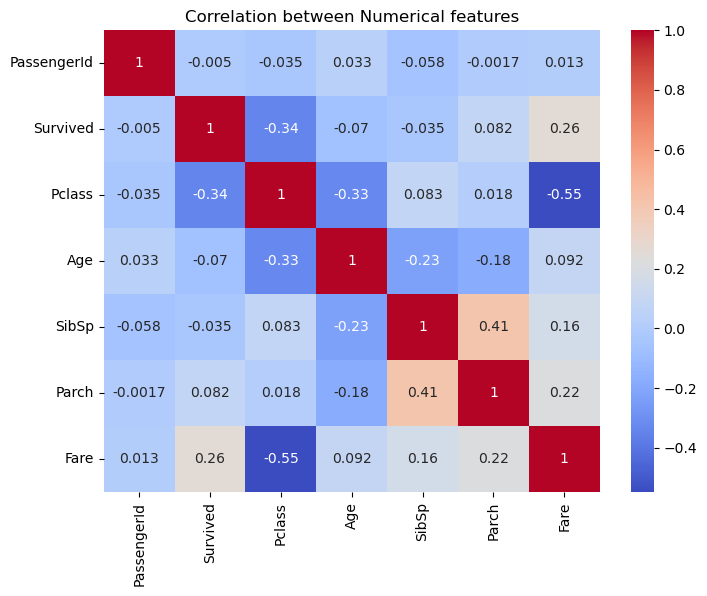

In [59]:
# Plot heatmap for correlation
plt.figure(figsize=[8,6])
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical features')
plt.show()

In [60]:
# Extract categorical columns from train and test data
cols = ['Sex', 'Embarked']
encoder = LabelEncoder()
for col in cols:
    TrainData[col] = encoder.fit_transform(TrainData[col])
    TestData[col] = encoder.fit_transform(TestData[col])

In [62]:
TrainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


## Test data using different ML models

In [163]:
selected_features = ['Pclass','Fare', 'Sex']
X_Train = TrainData[selected_features]
X_Test = TestData[selected_features]
Y_Train = TrainData['Survived']
Y_Test = TestData['Survived']

In [180]:
from sklearn.neighbors import KNeighborsClassifier

#KNN
KNNmodel = KNeighborsClassifier(n_neighbors=27).fit(X_Train,Y_Train)

#predictions
predictions_Knn = KNNmodel.predict(X_Test)

# Evaluate
acc_Knn = accuracy_score(Y_Test, predictions_Knn)
print(f"Accuracy of KNN Model: {acc_Knn}")

Accuracy of KNN Model: 0.8229665071770335


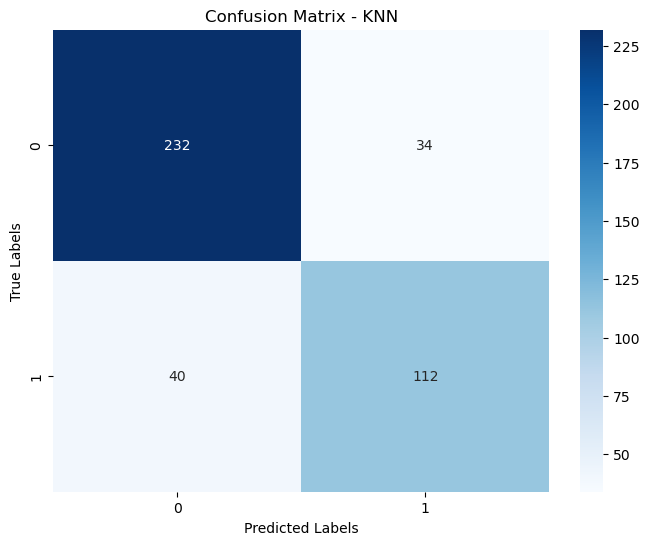

In [186]:
# Confusion Matrix for KNN
cm_knn = confusion_matrix(Y_Test, predictions_Knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [182]:
#Logistic Regression
LRmodel = LogisticRegression().fit(X_Train, Y_Train)

# Predictions
predictions_LR = LRmodel.predict(X_Test)

# Evaluate
acc_LR = accuracy_score(Y_Test, predictions_LR)
print(f"Accuracy of Logistic Regression Model: {acc_LR}")

Accuracy of Logistic Regression Model: 0.9952153110047847


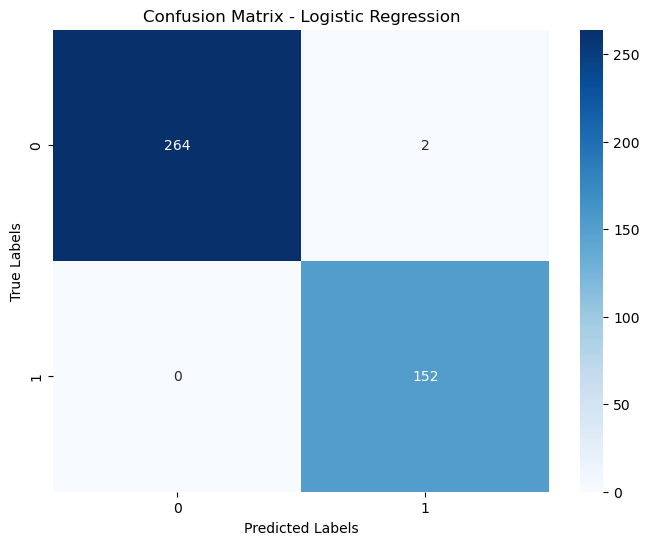

In [183]:
# Confusion Matrix for LR
cm_lr = confusion_matrix(Y_Test, predictions_LR)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [170]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NBmodel = NB.fit(X_Train, Y_Train)

# predictions
predictions_NB = NBmodel.predict(X_Test)

# Evaluate
acc_NB = accuracy_score(Y_Test, predictions_NB)
print(f"Accuracy of NB Model: {acc_NB}")

Accuracy of NB Model: 0.9473684210526315


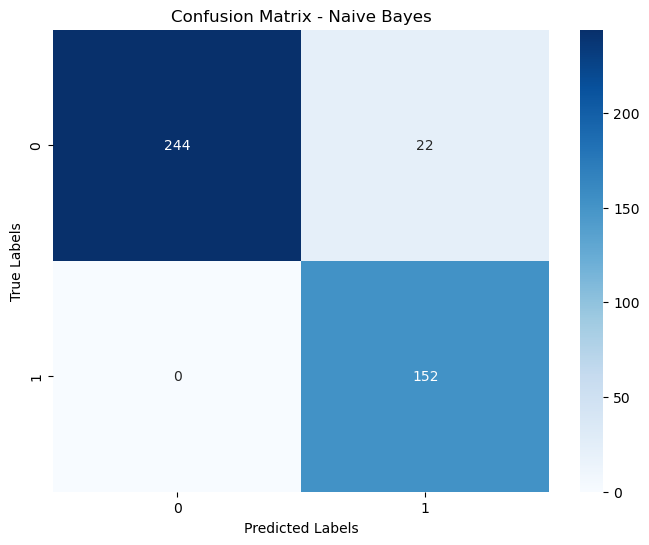

In [171]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(Y_Test, predictions_NB)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [190]:
#Ensemble Voting Classifier
from sklearn.ensemble import VotingClassifier

model1 = LRmodel
model2 = NBmodel
model3 = KNNmodel

#ensemble voting classifier
ensemble_model = VotingClassifier(estimators=[('lr', model1), ('nb', model2), ('knn', model3)], voting='hard')
ensemble_model.fit(X_Train,Y_Train)

#prediction
label_predicted = ensemble_model.predict(X_Test)

#evaluation
acc_enb = accuracy_score(Y_Test,label_predicted)
print("Accuarcy Score : ",acc_enb)
    

Accuarcy Score :  0.9497607655502392


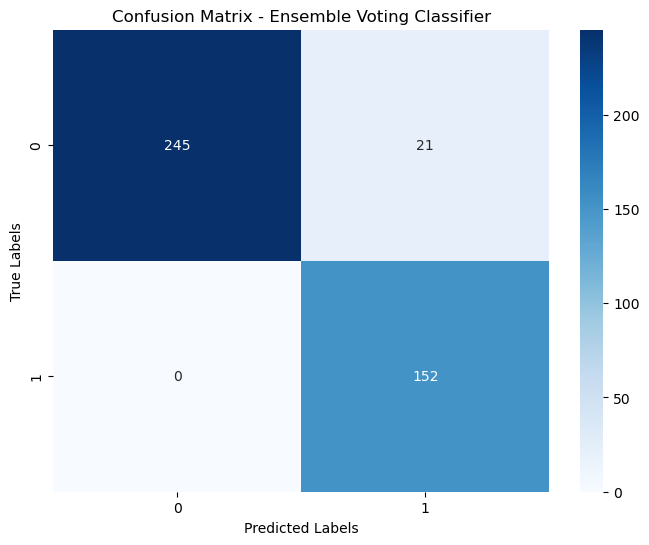

In [187]:
# Confusion Matrix for Ensemble voting classifier
cm_en = confusion_matrix(Y_Test, label_predicted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_en, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix - Ensemble Voting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [202]:
# Random Forest 
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model = rf.fit(X_Train, Y_Train)

# Predictions
predictions_rf = model.predict(X_Test)

# Evaluate on train-test-split
acc_rf = accuracy_score(Y_Test, predictions_rf)
print(f"Accuracy of RF Model: {acc_rf}")


Accuracy of RF Model: 0.9497607655502392


In [192]:
# Create df of results
accuracies = {
    'Models': ['Logistic Regression','Ensemble Voting','Naive Bayes','KNN','RF'],
    'Acc': [acc_LR, acc_NB, acc_Knn, acc_enb,acc_rf]
}

model = pd.DataFrame(accuracies)
model


,Models,Acc
0,Logistic Regression,0.995215
1,Ensemble Voting,0.947368
2,Naive Bayes,0.822967
3,KNN,0.949761
4,RF,0.949761


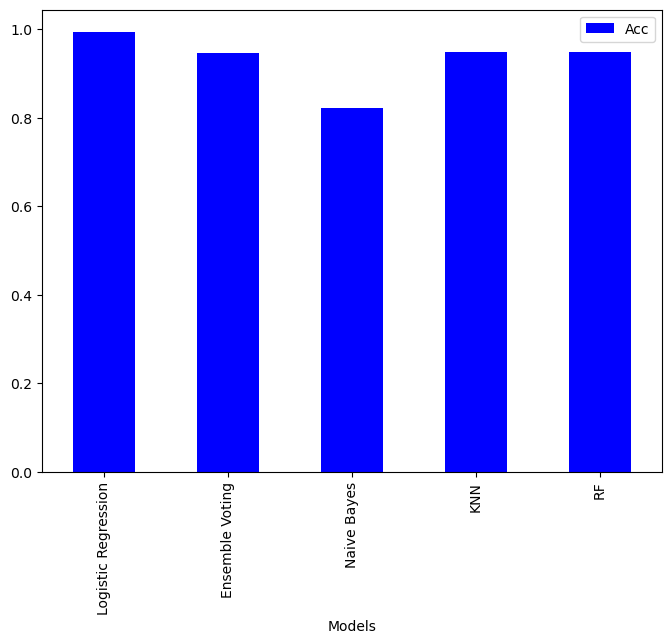

In [193]:
# Plot the results
model[['Models', 'Acc']].plot(kind='bar', x='Models', y='Acc', color='blue', figsize=[8,6])
plt.show()